In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from funciones_aux import reemplazar_no, guardar_resultado_en_csv, imprimir_resultados, RUTA_TRAIN, RUTA_TEST

In [22]:
df_train = pd.read_csv(RUTA_TRAIN)
df_test = pd.read_csv(RUTA_TEST)

In [23]:
df_train["sentimiento"] = df_train["sentimiento"].map({"positivo": 1, "negativo": 0})

In [24]:
RUTA_GUARDADO = "RF.csv"

In [25]:
df_train = reemplazar_no(df_train)
df_test = reemplazar_no(df_test)

In [26]:
df_train["review_es"], df_test["review_es"] = df_train["review_es"].str.lower(), df_test["review_es"].str.lower()

In [27]:
df_train_train, df_train_test = train_test_split(df_train, test_size=0.3, random_state=33)
x_train, y_train, x_test_, y_test_ = df_train_train["review_es"], df_train_train["sentimiento"], df_train_test["review_es"], df_train_test["sentimiento"]

In [28]:
x_test = df_test["review_es"]

In [29]:
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test_)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [31]:
def func_classif(param_distributions, cv, scoring, estimator, n_iter):
  randomcv = RandomizedSearchCV(estimator=estimator,
                                param_distributions = param_distributions,
                                scoring=scoring,
                                cv=cv,
                                n_jobs = -1,
                                n_iter=n_iter,
                                random_state=33)

  randomcv.fit(x_train_vec, y_train)

  return randomcv

In [32]:
n_iter = 5

param_distributions = { 
    "criterion" : ["gini", "entropy", "log_loss"],
    "min_samples_leaf" : [1, 5, 10, 20],
    "min_samples_split" : [2, 4, 10, 12, 16, 20],
    "n_estimators": [10, 30, 20, 40, 50, 60, 70, 80, 90, 100],
    "max_depth": range(15, 51) }


cv = StratifiedKFold(n_splits=5)

scoring = "accuracy"

estimator = RandomForestClassifier(random_state=33)

randomcv = func_classif(param_distributions, cv, scoring, estimator, n_iter)

In [33]:
best_rf = randomcv.best_estimator_

In [34]:
best_params_rf = randomcv.best_params_

In [35]:
best_params_rf

{'n_estimators': 90,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 39,
 'criterion': 'gini'}

In [36]:
best_rf = RandomForestClassifier(
            criterion=best_params_rf["criterion"],
            min_samples_leaf=best_params_rf["min_samples_leaf"],
            min_samples_split=best_params_rf["min_samples_split"],
            n_estimators=best_params_rf["n_estimators"],
            max_depth=best_params_rf["max_depth"])

In [37]:
best_rf.fit(x_train_vec, y_train)

y_pred = best_rf.predict(x_test_vec)

F1: 0.8298620883760203
Precision: 0.8461759219400201
Recall: 0.8141654010769018
Accuracy: 0.8327222414389485


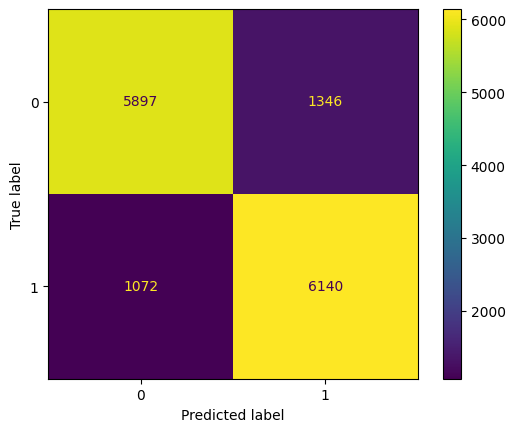

In [38]:
imprimir_resultados(y_test_, y_pred)

In [39]:
y_pred_ = best_rf.predict(vectorizer.transform(x_test))

In [40]:
guardar_resultado_en_csv(y_pred_, df_test, RUTA_GUARDADO)